# Instructions

1. Add your name below.
2. Complete each question. Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", and delete and `throw NotImplementedError()` lines.
3. Where applicable, run the test cases *below* each question to check your work.
4. Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). You can also use the **Validate** button to run all test cases.
5. Turn in your homework by going to the main screen in JupyterHub, clicking the Assignments menu, and submitting.



In [1]:
"""
Name: Xiaochun Liang 
"""

'\nName: Xiaochun Liang \n'

## Import the dataset

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('/etc/data/employees.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


## Label Encoding

In [4]:
# Create X and y
X = data.drop(['Attrition'], axis=1)
y = data['Attrition']

In this milestone, we're going to be using more evaluation metrics (e.g. precision, recall, F1-score). These metrics differentiate between a positive label (1) and a negative label (0). 

Currently the dataset has labels "No" and "Yes", and we need to encode them to show which is the positive class. We do this with a `LabelEncoder`.

Normally we like to do encoding in a pipeline, but pipelines only modify our features (X), not our labels (y), so we need to do this encoding first, even before we split our data. This also means if we have any new data (e.g. newly collected), we need to remember to run the `LabelEncoder` again.

**Note**: `LabelEncoder` is similar to `OrdinalEncoder` but you cannot specify the order of labels. It uses sort order. This works for our label, since "No" is alphabetically before "Yes", so No=0, Yes=1. If that didn't work out, we could also use an `OrdinalEncoder` and specify the positive class.


In [5]:
y[:5]

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

Instructions:
* Create a `LabelEncoder`
* Encode `y` and store it in a new variable: `y_encoded`
* **Note**: In Jupyter, it's a best practice to create new variables rather than overwriting them, since you may execute cells out of order. That's why we create a new `y_encoded` variable, rather than overwriting `y`.

Relevant Documentation:
* [`LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [6]:
from sklearn.preprocessing import LabelEncoder

# TODO: Create y_encoded
le = LabelEncoder()
le.fit(["No" , "Yes"])
le.classes_
y_encoded = le.transform(y)



y_encoded[:5]

array([1, 0, 1, 0, 0])

In [7]:
y

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [8]:
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [9]:
assert len(y_encoded) == len(y), "Make sure y_encoded is the same length as y"
assert y_encoded.mean() == (y == 'Yes').mean(), "Make sure that you've encoded No to 0 and 1 to Yes"

## Data Splitting
In the last milestone, we used a *Holdout* validation process during our experiments. In this milestone, we will use a process called cross-validation, which creates many validation datasets, so we don't need to create a stand-alone holdout dataset.

**Instructions**: Now split the dataset into train and test set:
* 80% Training Data
* 20% Test Data
* **Note**: You are recommended to use `random_state=1234` for the split, to ensure a deterministic result in the test cases below; however, these test cases should *not* make assumptions about your exact training and test sets.

Relevant documentation
* [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [10]:
from sklearn.model_selection import train_test_split

# TODO: Create the training, validation and testing X and y datasets
# Make sure you use y_encoded, not y!
X_train = X_test = X_val = None
y_train = y_test = y_val = None

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=1234)


In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1176, 34)
(294, 34)
(1176,)
(294,)


In [12]:
assert X_train.shape == (1176, 34)
assert X_test.shape == X_test.shape == (294, 34)
assert y_train.shape[0] == 1176
assert y_test.shape[0] == y_test.shape[0] == 294

assert 0 in y_test and 1 in y_test, "Make sure to use y_encoded, not y"
assert 0 in y_train and 1 in y_train, "Make sure to use y_encoded, not y"

## The Preprocessing Pipeline

In this milestone we will be comparing multiple classifiers. Each will need its own pipeline that includes the preprocessing steps we used last time.

Rather than duplicating these many steps across each pipeline, we can make a single **preprocessing pipeline**, and then reuse that pipeline for each of our models.
* **Note**: You can *nest* pipelines, so later we will include our preprocessing pipeline as a step in other pipelines.
* It is also *generally* ok to reuse preprocessing steps across different pipelines. Just be aware that the step (e.g., a `MinMaxScaler`) will remember its parameters (`min`, `max`) until it is `fit` again. We usually call `fit` during the train/evaluation process each time, so it's not an issue.

In [13]:
# Let's copy our code from the last Milestone

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder

nominal_columns = ['Department', 'EducationField', 'JobRole', 'MaritalStatus']
ordinal_or_binary_columns = ['BusinessTravel', 'OverTime', 'Gender']
irrelevant_columns = ['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18']

ordinal_encoder = OrdinalEncoder(categories=[
    ['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'],
    ['No', 'Yes'],
    ['Male', 'Female'],
])

feature_encoder = make_column_transformer(
    (OneHotEncoder(), nominal_columns),
    (ordinal_encoder, ordinal_or_binary_columns),
    ('drop', irrelevant_columns),
    remainder='passthrough'
)

scaler = MinMaxScaler()

**Instructions**:
* Create a `preprocessing_pipeline` that includes the `feature_encoder` and `scaler`.

Relevant Documentation:
* [`make_pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)

In [14]:
from sklearn.pipeline import make_pipeline

# TODO: Create the preprocessing pipeline, with no model at the end!
preprocessing_pipeline = None


preprocessing_pipeline = make_pipeline(feature_encoder, scaler)


In [15]:
assert preprocessing_pipeline.steps[0][1] == feature_encoder, "Remember encoding comes before scaling"
assert preprocessing_pipeline.steps[1][1] == scaler, "Remember scaling comes second"

## Creating Models for Comparison

In this lab, we will be comparing a few models and tuning their hyperparameters. We will compare the performance of the new DecisionTree model we learned against the k-NN model we have been using.

**Instructions**:
* Construct a pipeline with appropriate preprocessing and a DecisionTree model
* Make sure the decision tree uses a `random_state` of 1234. This will ensure deterministic results across runs.

Relevant documentation:
* [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html): Note the `random_state` parameter and why it is needed.




In [16]:

from sklearn.tree import DecisionTreeClassifier
# TODO: Create the pipeline (don't forget imports!)
decision_tree_pipeline = None

decision_tree_pipeline = make_pipeline(preprocessing_pipeline,DecisionTreeClassifier(random_state=1234))

In [17]:
# Test for decision_tree_pipeline
assert decision_tree_pipeline.steps[0][1] == preprocessing_pipeline, "The preprocessing pipeline should come first in the decision tree pipeline"
assert isinstance(decision_tree_pipeline.steps[1][1], DecisionTreeClassifier), "The second step should be a DecisionTreeClassifier"
assert decision_tree_pipeline.steps[1][1].random_state == 1234, "The DecisionTreeClassifier should have the correct random_state set to 1234"


**Instructions**:
* Construct a pipeline with appropriate preprocessing and a KNeighborsClassifier model.
* **Note**: We do not need to set any hyperparameters (e.g., k) here because we will tune them later.

Relevant documentation:

* [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [18]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# TODO: Create the pipeline (don't forget imports!)
knn_pipeline = None

knn_pipeline = make_pipeline(preprocessing_pipeline,KNeighborsClassifier())

In [19]:
# Test for knn_pipeline
assert knn_pipeline.steps[0][1] == preprocessing_pipeline, "The preprocessing pipeline should come first in the k-NN pipeline"
assert isinstance(knn_pipeline.steps[1][1], KNeighborsClassifier), "The second step should be a KNeighborsClassifier"


Remember in the first Milestone how our k-NN classifier (with a high value of k) performed just like a naive, majority-class classifier. It classified everything as a "No", the most common class, but still achieved over 80% accuracy. That suggests that achieving 80% accuracy is not, by itself, a difficult achievement. This time, let's compare our model against a this naive baseline, which sklearn calls a `DummyClassifier`.

**Instructions**:
* Construct a pipeline with appropriate preprocessing and a DummyClassifier model.
* Use the `most_frequent` strategy, which uses the majority class in the training data to classify new instances.

Relevant documentation:
* [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html): pay attention to the `strategy` parameter.

In [20]:
from sklearn.dummy import DummyClassifier
# TODO: Construct the dummy_pipeline
# Don't forget imports!
dummy_pipeline = None

# YOUR CODE HERE
dummy_pipeline = make_pipeline(preprocessing_pipeline,DummyClassifier(strategy="most_frequent"))

In [21]:
# Test for dummy_pipeline
assert dummy_pipeline.steps[0][1] == preprocessing_pipeline, "The preprocessing pipeline should come first in the DummyClassifier pipeline"
assert isinstance(dummy_pipeline.steps[1][1], DummyClassifier), "The second step should be a DummyClassifier"
assert dummy_pipeline.steps[1][1].strategy == 'most_frequent', "The DummyClassifier should use the 'most_frequent' strategy"


## Cross-validation for model comparison

We use cross-validation (CV) for two main purposes:
* Comparing models or design decisions, like we did in the last lab. Cross-validation is a more robust way to do this evalution than using single a holdout validation dataset.
* Doing hyperparameter tuning.

In this section, we will start with the first use case to compare our 3 models.

When doing crossvalidation, we need to use a consistent set of folds when comparing the performance of two models.
This is important - otherwise one model could perform better because it got an "easier" train/test split. We can define a set of k "folds" (divisions of the training dataset) using a `KFold` class.

**Instructions**:
* Create a `KFold` instance with 5 folds, shuffling the data, and with `random_state=1234` (any consistent state is ok).
* **Note**: Shuffle is very important, since the order of our data may not be random, and we want the validation sets to be representative of the whole dataset. Remember how the Iris dataset was sorted by class?

Relevant documentation:

* [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html): Pay attention to the `n_splits`, `shuffle` and `random_states` parameters.

In [22]:
from sklearn.model_selection import KFold

# TODO: Create k_fold
k_fold = None

k_fold = KFold(n_splits=5, shuffle=True,random_state=1234)



We can varify that the folds give us similar lengths of training/test datasets, but with different instances in each.
A given index is always either in training or test, never both or neither.

In [23]:
example_index = 28

# x and y are lists of indices
for x, y in k_fold.split(X_train, y_train):
    print(f"Fold with {len(x)} training indices and {len(y)} test indices")
    print(f"x indices: {x[:5]}...")
    print(f"y indices: {y[:5]}...")
    print(f"Instance #{example_index} is {'in' if example_index in x else 'NOT in'} the training data and {'in' if example_index in y else 'NOT in'} test data")
    print()

Fold with 940 training indices and 236 test indices
x indices: [0 1 2 3 4]...
y indices: [11 29 33 40 60]...
Instance #28 is in the training data and NOT in test data

Fold with 941 training indices and 235 test indices
x indices: [0 1 2 3 5]...
y indices: [ 4  7  9 21 24]...
Instance #28 is in the training data and NOT in test data

Fold with 941 training indices and 235 test indices
x indices: [0 1 2 3 4]...
y indices: [ 8 13 14 17 20]...
Instance #28 is NOT in the training data and in test data

Fold with 941 training indices and 235 test indices
x indices: [1 3 4 5 7]...
y indices: [ 0  2  6 16 18]...
Instance #28 is in the training data and NOT in test data

Fold with 941 training indices and 235 test indices
x indices: [0 2 4 6 7]...
y indices: [ 1  3  5 10 12]...
Instance #28 is in the training data and NOT in test data



In [24]:
# Test for k_fold
assert isinstance(k_fold, KFold), "k_fold should be an instance of KFold"
assert k_fold.n_splits == 5, "k_fold should have 5 splits"
assert k_fold.shuffle is True, "k_fold should shuffle the data"
assert k_fold.random_state == 1234, "k_fold should have a random_state set to 1234"


Now we need to define the evaluation metrics that we will use to compare the 2 models and 1 baseline.
Select any metrics you want to use for evaluation below, and make sure to include the standard 4 metrics for classification: Accuracy, Precision, Recall, and F1-Score.

Fortunately, sklearn recognizes these by name for many evaluation functions, such as cross-validation, but you have to type the name exactly. 

**Instructions**
* Look up the names of your 4+ evaluation metrics here on [this page](https://scikit-learn.org/stable/modules/model_evaluation.html#string-name-scorers).
* **Note**: Because this is a binary classification problem, you do not need to consider "macro" vs "micro" averages; use the default version of each metric.
* Put them in an array called `scoring_metrics`.

In [25]:
# TODO: Create an array of scoring metric function names (strings)
scoring_metrics = [ 'f1', 'recall','accuracy','precision']

# YOUR CODE HERE
scoring_metrics = [ 'f1', 'recall','accuracy','precision']


In [26]:
from sklearn.metrics import SCORERS

valid_metrics = list(SCORERS.keys())
for metric in scoring_metrics:
    assert metric in valid_metrics, f"Unrecognized metric name, {metric}"

Now we're ready to run cross-validation on a model to see how it performs across a variety of runs.

**Instructions**:
* Use the `cross_validate` function to evaluate your `decision_tree_pipeline` and save the results in `dt_performance`.
* Make sure you're using the appropriate X and y datasets (should it be training or test?).
* Use the `scoring_metrics` and `k_fold` splits you defined above.

Relevant documentation:
* [cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)
* [Cross-validation tutorial](https://scikit-learn.org/stable/modules/cross_validation.html)

In [27]:

from sklearn.model_selection import cross_validate
# TODO: Calculate the cross-validation performance of the DT (don't forget imports!)
dt_performance = None

# YOUR CODE HERE
dt_performance = cross_validate(decision_tree_pipeline, X_train, y_train,cv =k_fold , scoring=scoring_metrics)

We can view the results in a DataFrame, which give us the perforamnce of the classifier on each fold across each of our metrics, as well as `fit_time` (how many seconds the pipeline took to train) and `score_time` (how many seconds the pipeline took to predict).

In [28]:
# The results are a dictionary, but it's easier to see them as a DataFrame
pd.DataFrame(dt_performance)

,fit_time,score_time,test_f1,test_recall,test_accuracy,test_precision
0,0.094529,0.006444,0.289474,0.333333,0.771186,0.255814
1,0.074957,0.014220,0.297297,0.314286,0.778723,0.282051
2,0.015238,0.005479,0.333333,0.325000,0.778723,0.342105
3,0.082727,0.005508,0.285714,0.277778,0.787234,0.294118
4,0.014235,0.005457,0.383838,0.413043,0.740426,0.358491


In [29]:
# We can also take the average of each metric over rounds
pd.DataFrame(dt_performance).mean()

fit_time          0.056337
score_time        0.007421
test_f1           0.317931
test_recall       0.332688
test_accuracy     0.771259
test_precision    0.306516
dtype: float64

In [30]:
# Test for dt_performance

# Convert the results to a DataFrame
dt_performance_df = pd.DataFrame(dt_performance)

# Check that the number of rows corresponds to the number of folds (should be 5)
assert dt_performance_df.shape[0] == 5, f"Expected 5 rows for 5 folds, but got {dt_performance_df.shape[0]}"

# Check that there are at least 6 columns (for various metrics)
assert dt_performance_df.shape[1] >= 6, f"Expected at least 6 columns, but got {dt_performance_df.shape[1]}"

# Check if the accuracy is above 0.7 for each fold (assuming 'test_accuracy' is one of the metrics)
assert (dt_performance_df['test_accuracy'] > 0.7).all(), "Accuracy should be above 70% for all folds"

print("Tests passed successfully!")


Tests passed successfully!


**Instructions**:
* Use the `cross_validate` function to evaluate your `knn_pipeline` and save the results in `knn_performance`.
* Follow the same instructions as for the decision tree.

In [31]:
# TODO: Calculate the cross-validation performance of k-nn
knn_performance = None

# YOUR CODE HERE
knn_performance = cross_validate(knn_pipeline, X_train, y_train,cv =k_fold , scoring=scoring_metrics)

In [32]:
pd.DataFrame(knn_performance)

,fit_time,score_time,test_f1,test_recall,test_accuracy,test_precision
0,0.008281,0.483280,0.186047,0.121212,0.851695,0.400000
1,0.008247,0.591556,0.318182,0.200000,0.872340,0.777778
2,0.085770,0.415914,0.244898,0.150000,0.842553,0.666667
3,0.096963,0.598820,0.166667,0.111111,0.829787,0.333333
4,0.008475,0.489311,0.338462,0.239130,0.817021,0.578947


In [33]:
pd.DataFrame(knn_performance).mean()

fit_time          0.041547
score_time        0.515776
test_f1           0.250851
test_recall       0.164291
test_accuracy     0.842679
test_precision    0.551345
dtype: float64

In [34]:
# Test for knn_performance


# Convert the results to a DataFrame
knn_performance_df = pd.DataFrame(knn_performance)

# Check that the number of rows corresponds to the number of folds (should be 5)
assert knn_performance_df.shape[0] == 5, f"Expected 5 rows for 5 folds, but got {knn_performance_df.shape[0]}"

# Check that there are at least 6 columns (for various metrics)
assert knn_performance_df.shape[1] >= 6, f"Expected at least 6 columns, but got {knn_performance_df.shape[1]}"

# Check if the accuracy is above 0.8 for each fold (assuming 'test_accuracy' is one of the metrics)
assert (knn_performance_df['test_accuracy'] > 0.8).all(), "Accuracy should be > 80% for all folds"

print("Tests passed successfully!")


Tests passed successfully!


**Instructions**:
* Use the `cross_validate` function to evaluate your `dummy_pipeline` and save the results in `dummy_performance`.
* Follow the same instructions as for the decision tree.

In [35]:
# TODO: Calculate the cross-validation performance of the dummy classifier
dummy_performance = None

# YOUR CODE HERE
dummy_performance = cross_validate(dummy_pipeline, X_train, y_train,cv =k_fold , scoring=scoring_metrics)

/opt/tljh/user/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/tljh/user/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/tljh/user/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/tljh/user/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision 

Woah, that's a lot of warnings! Why is it telling us that there's a division by 0 when calculating performance for the dummy classifier?

In [36]:
pd.DataFrame(dummy_performance)

,fit_time,score_time,test_f1,test_recall,test_accuracy,test_precision
0,0.014480,0.006877,0.0,0.0,0.860169,0.0
1,0.008124,0.005650,0.0,0.0,0.851064,0.0
2,0.007185,0.066438,0.0,0.0,0.829787,0.0
3,0.007947,0.005664,0.0,0.0,0.846809,0.0
4,0.007248,0.005613,0.0,0.0,0.804255,0.0


In [37]:
pd.DataFrame(dummy_performance).mean()

fit_time          0.008997
score_time        0.018049
test_f1           0.000000
test_recall       0.000000
test_accuracy     0.838417
test_precision    0.000000
dtype: float64

In [38]:
dummy_df = pd.DataFrame(dummy_performance)
assert dummy_df['test_accuracy'].mean() >= 0.8, "Accuracy should be higher than 80%"
assert dummy_df['test_precision'].mean() == 0, "Precision should be 0"
assert dummy_df['test_recall'].mean() == 0, "Recall should be 0"
assert dummy_df['test_f1'].mean() == 0, "F1-score should be 0"

We can create a function to help us do this sort of evaluation more quickly in the future.

It takes in a set of ('name', `pipeline`) tuples, just like our last evaluation function, as well as a single X and y dataset to use, and a set of scoring metrics.

It calculates the cross-validation perforamnce of each one, and saves the average results into a dataframe.
* **Note**: This gives both mean (average) and std (standard deviation) of the performance across CV folds.

In [39]:
def evaluate_pipelines_cv(pipelines, X_evaluate, y_evaluate, scoring_metrics, k_fold=5):
    rows = []
    for name, pipeline in pipelines:
        # Perform cross-validation and convert results to a DataFrame
        performance = cross_validate(
            pipeline,
            X_evaluate, y_evaluate, cv=k_fold,
            scoring=scoring_metrics
        )
        performance_df = pd.DataFrame(performance)
        
        # Compute mean and std, rename columns with appropriate suffix
        mean = performance_df.mean().add_suffix("_mean")
        std = performance_df.std().add_suffix("_std")
        
        # Combine mean and std into a single DataFrame
        summary = pd.concat([mean, std], axis=0)
        summary["Name"] = name
        
        rows.append(summary)
    
    # Concatenate all summary results and reset index
    results = pd.DataFrame(rows)
    # Reorder columns to put "Name" first
    columns_order = ["Name"] + sorted([col for col in results.columns if col != "Name"])
    return results[columns_order]

In [40]:
# Now we can use this function to quickly run and compare all 3 pipelines
evaluate_pipelines_cv(
    [
        ('Decision Tree', decision_tree_pipeline),
        ('KNN', knn_pipeline),
        
    ],
    X_train, y_train,
    scoring_metrics
)

,Name,fit_time_mean,fit_time_std,score_time_mean,score_time_std,test_accuracy_mean,test_accuracy_std,test_f1_mean,test_f1_std,test_precision_mean,test_precision_std,test_recall_mean,test_recall_std
0,Decision Tree,0.042558,0.034341,0.006311,0.001392,0.780635,0.019512,0.321331,0.078490,0.319692,0.062171,0.326316,0.102935
1,KNN,0.026284,0.037047,0.551749,0.086836,0.839286,0.008709,0.232269,0.066336,0.508333,0.111803,0.152632,0.050619


## Cross-validation for Hyperparameter Tuning

The other main use of cross-validation is to tune hyperparameters. That's what we'll do in this section.

### EDA to determine tuned hyperparameters and appropriate ranges

Return to your planning document. There is a section there that asks you do to EDA to decide on the appropriate ranges to use for hyperparameters. Do that EDA here. See examples below.

When doing hyperparameter tuning, sklearn recognizes a hyperparameter in the following format:

`pipeline-step-name__model-parameter-name` (note 2 underscores between them)

For example, if we have a step called `decisiontreeclassifier`, and it has a parameter called `max_depth` the hyperparameter's name would be: `decisiontreeclassifier__max_depth`.

In [41]:
# First, we get the name of the DecisionTreeClassifier step, so we can tune
# its hyperparameters. We need to specify the step name; otherwise,
# GridSearchCV won't know where the DT step is.
dt_step_name = decision_tree_pipeline.steps[1][0]
step_prefix = '__'
dt_step_prefix = f"{dt_step_name}{step_prefix}"
dt_step_prefix

'decisiontreeclassifier__'

In [42]:
# Same thing for k-NN
knn_step_name = knn_pipeline.steps[1][0]
knn_step_prefix = f"{knn_step_name}{step_prefix}"
knn_step_prefix

'kneighborsclassifier__'

**Instructions**:
* Identify names for a decision tree's max depth, post pruning alpha (i.e., leaf node penalty), and split criterion (i.e. GINI vs Information Gain) parameters.
* Use the `dt_step_prefix` to create the appropriate keys for hyperparameter tuning, as described above.

Relevant documentation:
* [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [49]:
# TODO: Define the parameter keys
dt_max_depth_key = alpha_key = criterion_key = None

# YOUR CODE HERE

dt_max_depth_key = dt_step_prefix + 'max_depth'
alpha_key = dt_step_prefix + 'ccp_alpha'
criterion_key = dt_step_prefix + 'criterion'

print(dt_max_depth_key)
print(alpha_key)
print(criterion_key)

decisiontreeclassifier__max_depth
decisiontreeclassifier__ccp_alpha
decisiontreeclassifier__criterion


In [44]:
dt_max_depth_key = dt_step_prefix + 'max_depth'
dt_max_depth_key 

'decisiontreeclassifier__max_depth'

In [50]:
dt_param_keys = DecisionTreeClassifier().get_params().keys()
for key in [dt_max_depth_key,  alpha_key, criterion_key]:
    assert key.startswith(dt_step_name), f"Key {key} should start with {dt_step_name}"
    assert "__" in key, f"Key {key} should be connected by a double underscope __"
    assert key[key.index("__") + 2:] in dt_param_keys, f"Key {key} should end with a DT parameter name"

**Instructions**:
* Identify names for `KNeighborsClassifier`'s k and metric parameters.
* Use the `knn_step_prefix` to create the appropriate keys for hyperparameter tuning, as described above.

Relevant documentation:
* [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [51]:
# TODO: Define the parameter keys
knn_k_key = knn_metric_key = None

# YOUR CODE HERE
knn_k_key = knn_step_prefix + 'n_neighbors'
knn_metric_key = knn_step_prefix + 'metric'

print(knn_k_key)
print(knn_metric_key)

kneighborsclassifier__n_neighbors
kneighborsclassifier__metric


In [52]:
knn_param_keys = KNeighborsClassifier().get_params().keys()
for key in [knn_k_key, knn_metric_key]:
    assert key.startswith(knn_step_name), f"Key {key} should start with {knn_step_name}"
    assert "__" in key, f"Key {key} should be connected by a double underscope __"
    assert key[key.index("__") + 2:] in knn_param_keys, f"Key {key} should end with a k-NN parameter name"

Our goal is to find a useful range of values to test for each hyperparameter. Let's start with the **`max_depth`** hyperparameter. First, we use external sources and/or EDA to determine a reasonable starting range. We'll improve it later. In this case, start with the following range for `max_depth`: `[5, 15, 25, 35]`.

To do the actual exploration, we will use the `GridSearchCV` class. `GridSearchCV` acts like any other model (e.g., `DecisionTreeClassifier` or `KNeighborsClassifier`), but when it is `fit` to training data, it will search over a grid of hyperparmaeters for the best value, using cross-validation within the training data. It then trains a final model with the best hyperparameter values, using all training data, and that's what it uses for prediction.

**Important Note**: We are not choosing the final values of our hyperparameters here. A proper grid search uses *all* hyperparameters, not just one at a time. Our strategy here is to find a reasonable *range* of possible hyperparameter values to explore during the full grid search later.

**Instructions**
* Create a param_grid dictionary, where the `dt_max_depth_key` corresponds to the list of values to test: `[5, 15, 25, 35]`
* Define a `GridSearchCV` model, using the `decision_tree_pipeline`, `param_grd`, and `k_fold` you defined. 
* Use `"f1"` as a scoring function, since this works better for imbalanced data than accuracy.
* `fit` the `grid_search` model to your training dataset.

Relevant documentation:
* [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)



In [57]:
from sklearn.model_selection import GridSearchCV

# TODO: Define the pram_grid and grid_search
param_grid = None
grid_search = None

param_grid = {
  dt_max_depth_key: [5, 15, 25, 35]
}

grid_search = GridSearchCV(decision_tree_pipeline, param_grid, scoring="f1", cv = k_fold)
grid_search.fit(X_train, y_train)

# Print the best parameters
grid_search.best_params_

{'decisiontreeclassifier__max_depth': 15}

We can see more in-depth results, such as how each well hyperparameter did, averaged across folds, and how much variance (std) there was across folds.

In [58]:
result_columns = [f"param_{dt_max_depth_key}", "mean_test_score", "std_test_score", "rank_test_score"]

# We show only a subset of the results for easier interpretation
pd.DataFrame(grid_search.cv_results_)[result_columns]

,param_decisiontreeclassifier__max_depth,mean_test_score,std_test_score,rank_test_score
0,5,0.286731,0.058248,4
1,15,0.318731,0.035196,1
2,25,0.317931,0.037026,2
3,35,0.317931,0.037026,2


In [59]:
# Test to ensure param_grid is defined correctly
assert dt_max_depth_key in param_grid, f"param_grid should contain the key {dt_max_depth_key}"
assert param_grid[dt_max_depth_key] == [5, 15, 25, 35], "param_grid values for max_depth are incorrect"
assert dt_max_depth_key in grid_search.best_params_, "Make sure you used your param grid for your GridSearchCV"
assert grid_search.cv.n_splits == 5, "Make sure you are using the k_fold we defined for your CV"
assert grid_search.scoring == 'f1', "Make sure you are using f1-score for scoring"

Our next step is to refine our search values, adjusting the min/max values to be bigger, smaller, farther apart or closer together. Refer to your planning document for tips on how to do this.

The method below will help you explore hyperparamters values in a single line of code. Your planning document should help you understand how to fill in the parameters. It takes:
* A pipeline to tune
* A single parameter name to tune
* `X_train` and `y_train`
* A `k_fold` object and a `scoring` metric (e.g. `"f1"`)

**Instructions**
* Using your planning document, complete EDA to define appropraite hyperparamter ranges for each hyperparameter in the **DT** and **KNN** models.

In [63]:
def explore_single_hp_values(pipeline, param_name, param_values, X_train, y_train, k_fold, scoring):
    param_grid = {param_name: param_values}
    grid_search = GridSearchCV(pipeline, param_grid, cv=k_fold, scoring=scoring)
    grid_search.fit(X_train, y_train)
    result_columns = [f"param_{param_name}", "mean_test_score", "std_test_score", "rank_test_score"]
    return pd.DataFrame(grid_search.cv_results_)[result_columns]


In [64]:
explore_single_hp_values(decision_tree_pipeline, alpha_key, [0, 0.1, 0.2, 0.3], X_train, y_train, k_fold, 'f1')

,param_decisiontreeclassifier__ccp_alpha,mean_test_score,std_test_score,rank_test_score
0,0,0.317931,0.037026,1
1,0.1,0.000000,0.000000,2
2,0.2,0.000000,0.000000,2
3,0.3,0.000000,0.000000,2


In [66]:
# TODO: More EDA!
explore_single_hp_values(decision_tree_pipeline, alpha_key, [0, 0.033, 0.066, 0.1], X_train, y_train, k_fold, 'f1')

,param_decisiontreeclassifier__ccp_alpha,mean_test_score,std_test_score,rank_test_score
0,0,0.317931,0.037026,1
1,0.033,0.000000,0.000000,2
2,0.066,0.000000,0.000000,2
3,0.1,0.000000,0.000000,2


In [69]:
explore_single_hp_values(decision_tree_pipeline, alpha_key, [0, 0.0001, 0.001, 0.01,0.1], X_train, y_train, k_fold, 'f1')

,param_decisiontreeclassifier__ccp_alpha,mean_test_score,std_test_score,rank_test_score
0,0,0.317931,0.037026,2
1,0.0001,0.317931,0.037026,2
2,0.001,0.320180,0.040213,1
3,0.01,0.308433,0.051420,4
4,0.1,0.000000,0.000000,5


In [71]:
explore_single_hp_values(decision_tree_pipeline, dt_max_depth_key, [13,15,17,19], X_train, y_train, k_fold, 'f1')

,param_decisiontreeclassifier__max_depth,mean_test_score,std_test_score,rank_test_score
0,13,0.332538,0.041996,1
1,15,0.318731,0.035196,2
2,17,0.317931,0.037026,3
3,19,0.317931,0.037026,3


In [72]:
explore_single_hp_values(decision_tree_pipeline, dt_max_depth_key, [14,13,12,11,10], X_train, y_train, k_fold, 'f1')

,param_decisiontreeclassifier__max_depth,mean_test_score,std_test_score,rank_test_score
0,14,0.329210,0.040607,2
1,13,0.332538,0.041996,1
2,12,0.308088,0.045315,3
3,11,0.307716,0.062832,4
4,10,0.297850,0.081414,5


In [73]:
explore_single_hp_values(knn_pipeline, knn_k_key, [14,13,12,11,10], X_train, y_train, k_fold, 'f1')

,param_kneighborsclassifier__n_neighbors,mean_test_score,std_test_score,rank_test_score
0,14,0.084144,0.041577,5
1,13,0.153814,0.038655,2
2,12,0.115039,0.023527,4
3,11,0.170490,0.040673,1
4,10,0.139935,0.034772,3


In [74]:
explore_single_hp_values(knn_pipeline, knn_k_key, [1,3,5,7,9], X_train, y_train, k_fold, 'f1')

,param_kneighborsclassifier__n_neighbors,mean_test_score,std_test_score,rank_test_score
0,1,0.273596,0.055429,2
1,3,0.286437,0.074660,1
2,5,0.250851,0.068602,3
3,7,0.190827,0.033466,4
4,9,0.177875,0.043775,5


In [75]:
explore_single_hp_values(knn_pipeline, knn_k_key, [1,2,3,4,5], X_train, y_train, k_fold, 'f1')

,param_kneighborsclassifier__n_neighbors,mean_test_score,std_test_score,rank_test_score
0,1,0.273596,0.055429,2
1,2,0.187779,0.037102,5
2,3,0.286437,0.074660,1
3,4,0.200345,0.078964,4
4,5,0.250851,0.068602,3


### Hyperparameter Tuning

Now it's time to do a proper grid search over all of our hyperparameters, not just one at a time.

**Instructions**
* Define a `dt_param_grid` dictionary with values for `max_depth`, `alpha` and `criterion`, based on the best ranges you discovered in EDA above.
* **Note**: For each hyperparameter's search space, use **no more than 5 possible values**. This will reduce computation time.
* Define a variable `grid_search_dt` with a `GridSearchCV` to search over this grid for the `decision_tree_pipeline`.
* `fit` your model with your training data

In [76]:
# For this part of the assignment, we will only use 5-fold CV to save on computation
# On your own machine, you may want to use a higher value of k
k_fold = KFold(n_splits=5, shuffle=True, random_state=1234)

In [78]:
# TODO: Define the dt_param_grid and grid_search_dt
dt_param_grid = grid_search_dt = None

dt_param_grid =  {
  dt_max_depth_key:[14,13,12,11,10],
    alpha_key:[0, 0.0001, 0.001, 0.01,0.1],
    criterion_key:["gini", "entropy"]
}
grid_search_dt = GridSearchCV(decision_tree_pipeline, dt_param_grid, scoring="f1", cv = k_fold)
grid_search_dt.fit(X_train, y_train)

grid_search_dt.best_params_

{'decisiontreeclassifier__ccp_alpha': 0.01,
 'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 14}

In [79]:
# And see how well our best-fit model did during CV
grid_search_dt.best_score_

0.36508550665539363

In [80]:
# Confirm the param grid has the correct keys
def confirm_param_grid(param_grid):
    expected_keys = [dt_max_depth_key, alpha_key, criterion_key]
    for key in expected_keys:
        assert key in param_grid, f"Missing key in param_grid: {key}"
    print("All expected keys are present in the param grid.")

# Confirm that grid_search_dt has been created and fit
def confirm_grid_search_fit(grid_search, X_train, y_train):
    assert grid_search is not None, "grid_search_dt has not been created."
    assert hasattr(grid_search, "best_params_"), "grid_search_dt has not been fit."
    print("GridSearchCV has been created and fit successfully.")

# Run the confirmation tests
confirm_param_grid(dt_param_grid)
confirm_grid_search_fit(grid_search_dt, X_train, y_train)

All expected keys are present in the param grid.
GridSearchCV has been created and fit successfully.


In [81]:
# See all results
pd.DataFrame(grid_search_dt.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decisiontreeclassifier__ccp_alpha,param_decisiontreeclassifier__criterion,param_decisiontreeclassifier__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028567,0.023345,0.004998,0.000656,0,gini,14,"{'decisiontreeclassifier__ccp_alpha': 0, 'deci...",0.278481,0.351351,0.346667,0.285714,0.383838,0.329210,0.040607,20
1,0.051595,0.030606,0.006258,0.002320,0,gini,13,"{'decisiontreeclassifier__ccp_alpha': 0, 'deci...",0.301370,0.320000,0.351351,0.285714,0.404255,0.332538,0.041996,18
2,0.025988,0.022280,0.028020,0.026569,0,gini,12,"{'decisiontreeclassifier__ccp_alpha': 0, 'deci...",0.289474,0.324324,0.307692,0.240000,0.378947,0.308088,0.045315,33
3,0.036780,0.025963,0.006709,0.002520,0,gini,11,"{'decisiontreeclassifier__ccp_alpha': 0, 'deci...",0.273973,0.342857,0.298507,0.218750,0.404494,0.307716,0.062832,36
4,0.038940,0.029668,0.016593,0.021746,0,gini,10,"{'decisiontreeclassifier__ccp_alpha': 0, 'deci...",0.297297,0.303030,0.257143,0.191781,0.440000,0.297850,0.081414,39
5,0.040379,0.028784,0.018058,0.023970,0,entropy,14,"{'decisiontreeclassifier__ccp_alpha': 0, 'deci...",0.309524,0.428571,0.368421,0.230769,0.436782,0.354813,0.077178,9
6,0.028706,0.022199,0.005414,0.000754,0,entropy,13,"{'decisiontreeclassifier__ccp_alpha': 0, 'deci...",0.309524,0.444444,0.368421,0.246575,0.436782,0.361149,0.075503,6
7,0.037846,0.027518,0.015844,0.022144,0,entropy,12,"{'decisiontreeclassifier__ccp_alpha': 0, 'deci...",0.302326,0.371429,0.315789,0.202899,0.436782,0.325845,0.077659,24
8,0.050963,0.030097,0.005628,0.001359,0,entropy,11,"{'decisiontreeclassifier__ccp_alpha': 0, 'deci...",0.302326,0.428571,0.368421,0.153846,0.431818,0.336996,0.103064,15
9,0.039048,0.029976,0.005138,0.000583,0,entropy,10,"{'decisiontreeclassifier__ccp_alpha': 0, 'deci...",0.320988,0.434783,0.346667,0.147059,0.439560,0.337811,0.106305,12


One of the best ways to visualize our results is with a heat map, showing how validation F1 score changes based on the combination of our two continuous hyperparameters. In this code, we have selected the subset of the results only for where criterion = GINI.

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_gridsearch_heatmap(results_df, x_param, y_param, score='mean_test_score'):    
    # Pivot the table to format it for a heatmap
    heatmap_data = results_df.pivot(index=f'param_{y_param}', columns=f'param_{x_param}', values=score)
    
    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.3f', linewidths=0.5)
    plt.title(f'Grid Search Results: {score}')
    plt.xlabel(x_param)
    plt.ylabel(y_param)
    plt.show()

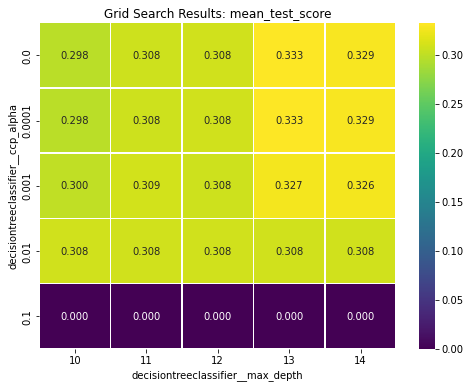

In [83]:
results = pd.DataFrame(grid_search_dt.cv_results_)
results = results[results['param_' + criterion_key] == 'gini']
plot_gridsearch_heatmap(results, dt_max_depth_key, alpha_key)

Now do the same thing for the k-NN classifier!

**Instructions**
* Define a `knn_param_grid` dictionary with values for `n_neighbors` and `metric`, based on the best ranges you discovered in EDA above.
* Define a variable `grid_search_knn` with a `GridSearchCV` to search over this grid for the `knn_pipeline`.
* `fit` your model with your training data.

In [84]:
# TODO: Define the knn_param_grid and grid_search_knn
knn_param_grid = grid_search_knn = None

knn_param_grid = {
    
knn_k_key : [1,2,3,4,5],
knn_metric_key :[ 'minkowski','precomputed']
}
grid_search_knn = GridSearchCV(knn_pipeline,knn_param_grid, scoring="f1", cv = k_fold)
grid_search_knn.fit(X_train, y_train)

grid_search_knn.best_params_

/opt/tljh/user/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/tljh/user/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/tljh/user/lib/python3.7/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/tljh/user/lib/python3.7/site-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/opt/tljh/user/lib

{'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__n_neighbors': 3}

In [85]:
# Confirm that the param grid has the correct keys
def validate_knn_param_grid(param_grid):
    required_keys = [knn_k_key, knn_metric_key]  # Expected keys in the param grid
    missing_keys = [key for key in required_keys if key not in param_grid]
    if missing_keys:
        raise ValueError(f"Missing keys in knn_param_grid: {missing_keys}")
    else:
        print("knn_param_grid has the correct keys!")

# Confirm that the grid_search_knn has been created and fit
def validate_grid_search_knn(grid_search_model):
    if not hasattr(grid_search_model, 'best_params_'):
        raise ValueError("grid_search_knn has not been created or fit yet.")
    else:
        print("grid_search_knn has been created and fit!")

# Run the validation
validate_knn_param_grid(knn_param_grid)
validate_grid_search_knn(grid_search_knn)


knn_param_grid has the correct keys!
grid_search_knn has been created and fit!


In [86]:
# See all results
pd.DataFrame(grid_search_knn.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsclassifier__metric,param_kneighborsclassifier__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.027067,0.034573,0.627516,0.169536,minkowski,1,"{'kneighborsclassifier__metric': 'minkowski', ...",0.241379,0.347826,0.333333,0.228571,0.216867,0.273596,0.055429,2
1,0.027317,0.034227,0.529842,0.100973,minkowski,2,"{'kneighborsclassifier__metric': 'minkowski', ...",0.157895,0.227273,0.212766,0.130435,0.210526,0.187779,0.037102,5
2,0.009445,0.000596,0.548933,0.079256,minkowski,3,"{'kneighborsclassifier__metric': 'minkowski', ...",0.200000,0.301887,0.377358,0.200000,0.352941,0.286437,0.074660,1
3,0.008649,0.000384,0.550075,0.051121,minkowski,4,"{'kneighborsclassifier__metric': 'minkowski', ...",0.102564,0.285714,0.173913,0.139535,0.300000,0.200345,0.078964,4
4,0.008932,0.000260,0.629200,0.187116,minkowski,5,"{'kneighborsclassifier__metric': 'minkowski', ...",0.186047,0.318182,0.244898,0.166667,0.338462,0.250851,0.068602,3
5,0.022228,0.028663,0.000000,0.000000,precomputed,1,{'kneighborsclassifier__metric': 'precomputed'...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
6,0.020143,0.025263,0.000000,0.000000,precomputed,2,{'kneighborsclassifier__metric': 'precomputed'...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
7,0.018489,0.021596,0.000000,0.000000,precomputed,3,{'kneighborsclassifier__metric': 'precomputed'...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
8,0.019195,0.024162,0.000000,0.000000,precomputed,4,{'kneighborsclassifier__metric': 'precomputed'...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
9,0.018241,0.021706,0.000000,0.000000,precomputed,5,{'kneighborsclassifier__metric': 'precomputed'...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


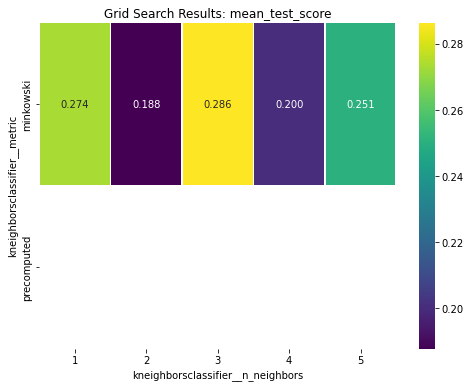

In [87]:
# Visualize the results
plot_gridsearch_heatmap(pd.DataFrame(grid_search_knn.cv_results_), knn_k_key, knn_metric_key)

## Final Evaluation

Now it's time to compare our final, tuned DT and KNN models against untuned baselines and our naive baseline.

Let's start with a single, manual evaluation of the tuned `grid_search_dt` model.

**Instructions**:
* Create predictions for the labels of the **test dataset** using your trained `grid_search_dt`.
* Print a `classification_report` of the performance on the **test dataset**.

Relevant documentation:
* [classification_report](https://www.analyticsvidhya.com/blog/2021/06/performance-comparision-of-tuned-and-untuned-classification-models/)



In [90]:
from sklearn.metrics import classification_report
# TODO: Predict with grid_search_dt and save the results
y_pred_dt = grid_search_dt.predict(X_test)
# TODO: Create a classification report of the performance
# Don't forget imports
report = classification_report(y_test, y_pred_dt)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.96      0.91       247
           1       0.56      0.30      0.39        47

    accuracy                           0.85       294
   macro avg       0.72      0.63      0.65       294
weighted avg       0.83      0.85      0.83       294



In [91]:
from numpy.testing import assert_array_equal
assert_array_equal(y_pred_dt, grid_search_dt.predict(X_test))
assert report == classification_report(y_test, y_pred_dt), "Make sure you are using the test dataset!"

We could use this process to do a **Holdout** evaluation of each model on the test dataset, but it would be easier if we had a way to collect and compare the results from multiple models. There are many ways to write such a method, but we've included one below.

Like prior versions of our `evaluate_pipelines` method, this one takes as input a set of `("Name", pipeline)` tuples of the pipelines you want to evaluate, as well as your training and evaluation datasets (in this case training and test).

This version also includes not just accuracy, but precision, recall and f1-score as well!

In [92]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_pipelines_holdout(pipelines, X_train, y_train, X_evaluate, y_evaluate):
    rows = []
    for name, pipeline in pipelines:
        pipeline.fit(X_train, y_train)
        test_predictions = pipeline.predict(X_evaluate)
        row = {'name': name}
        for metric in [accuracy_score, precision_score, recall_score, f1_score]:
            metric_name = metric.__name__
            row[f'eval_{metric_name}'] = metric(y_evaluate, test_predictions)
        rows.append(row)
    return pd.DataFrame(rows)

**Instructions**: Use `evaluate_pipelines_holdout` to compare the following models, training on the training dataset and evaluating on the test dataset: Your tuned and untuned grid search, your tuned and untuned knn, and the dummy pipeline.

**Remember**: The unput takes the form of a list of `("Name", pipeline)` tuples!

**Note**: This will take a while to run! Expect a minute or two.

**Note**: You will get a warning because the dummy classifier has undefined precisions. This is normal, since it is classifying everything as "No", so precision is undefined.

In [94]:
# TODO: Run the evaluation
test_results = evaluate_pipelines_holdout([
        ('Decision Tree', decision_tree_pipeline),
        ('KNN', knn_pipeline),
        ('Dummy',dummy_pipeline),
        ('Grid_search_dt', grid_search_dt),
        ('Grid_search_knn', grid_search_knn)
    ], X_train, y_train, X_test, y_test)



test_results

/opt/tljh/user/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/tljh/user/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/tljh/user/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/tljh

,name,eval_accuracy_score,eval_precision_score,eval_recall_score,eval_f1_score
0,Decision Tree,0.802721,0.387755,0.404255,0.395833
1,KNN,0.826531,0.375000,0.127660,0.190476
2,Dummy,0.840136,0.000000,0.000000,0.000000
3,Grid_search_dt,0.850340,0.560000,0.297872,0.388889
4,Grid_search_knn,0.833333,0.437500,0.148936,0.222222


In [95]:
assert test_results.name.nunique() == 5, "Remember to test all 5 pipelines"
assert test_results.eval_f1_score.nunique() == 5, "Remember that all 5 pipelines should be different"
assert test_results.eval_f1_score.min() == 0, "Don't forget the dummy classifier!"

Remember that our best hyperparameters were selecting based on our *training* dataset (using different train/validation folds), and the training dataset, just by chance, is a bit different from out test dataset. It's therefore interesting to see what effect hyperparameter tuning had on our *training* performance as well.

**Instructions**: Use `evaluate_pipelines_holdout` to compare the the same 5 models, training on the training dataset and evaluating **also on the training dataset**.

In [96]:
# TODO: Run the evaluation
training_results = evaluate_pipelines_holdout([
        ('Decision Tree', decision_tree_pipeline),
        ('KNN', knn_pipeline),
        ('Dummy',dummy_pipeline),
        ('Grid_search_dt', grid_search_dt),
        ('Grid_search_knn', grid_search_knn)
    ], X_train, y_train, X_train, y_train)


training_results

/opt/tljh/user/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/tljh/user/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/tljh/user/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/tljh

,name,eval_accuracy_score,eval_precision_score,eval_recall_score,eval_f1_score
0,Decision Tree,1.000000,1.000000,1.000000,1.000000
1,KNN,0.874150,0.791667,0.300000,0.435115
2,Dummy,0.838435,0.000000,0.000000,0.000000
3,Grid_search_dt,0.852041,0.597561,0.257895,0.360294
4,Grid_search_knn,0.892007,0.824742,0.421053,0.557491


In [97]:
assert training_results.name.nunique() == 5, "Remember to test all 5 pipelines"
assert training_results.eval_f1_score.min() == 0, "Don't forget the dummy classifier!"

**Remember**: Make sure to complete all problems (.ipynb files) in this assignment. When you finish, double-check the submission instructions at the top of this file, and submit on JupyterHub.